# Assignment 5 (Week 5)

>**Note**: Late submissions are ***`penalized`***.

## Name: Osarieme Ehimwenma

<br>

## Please show and display ALL your calculations and results.
> Remember to read the **`instructions`** carefully.

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Built-in library
import itertools
import typing as tp

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


### Download the data [here](https://drive.google.com/file/d/1BhBejDklCoqsqqAcvycA4n7AIpeRnych/view?usp=share_link)

### Problem Statement

**Customer Personality Analysis** is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### Target
Need to perform **clustering** to summarize customer segments.

### Attributes

```
Attributes

People
------
ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products
--------
MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years

Promotion
---------
NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place
-----
NumWebPurchases: Number of purchases made through the company’s website
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s website in the last month
```

## Qs 1
* a) Find the average of all the total amount spent on products. Call this variable `Avg_amount`. 
* b) Convert the `Avg_amount` to deciles (0,1,2,...,9) by creating a new variable, `Avg_amount(weights)` such that the higher the Avg_score, the higher the weight.

    * **COMPULSORY**: Validate your resulting by running:

```python
df[["Total_amount", "Avg_amount", "Avg_amount(weights)"]].sample(n=5, random_state=2)
```

In [2]:
# load data
fp = "C:/Users/HP/Desktop/SGA1_4/marketing_campaign.csv"
data = pd.read_csv(fp, sep="\t")

print(f"shape of Data: {data.shape}\n")

# Create DataFrame
df = pd.DataFrame(data)
df.head()

shape of Data: (2240, 29)



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
# Determine the discrete and continuous variables
discrete_vars, continuous_vars = [], []
THRESH = 20  # Threshold for determining the numeric type

for var in df.columns:
    n_unique = df[var].nunique()
    if n_unique > THRESH:
        continuous_vars.append(var)
    else:
        discrete_vars.append(var)

continuous_vars, discrete_vars

(['ID',
  'Year_Birth',
  'Income',
  'Dt_Customer',
  'Recency',
  'MntWines',
  'MntFruits',
  'MntMeatProducts',
  'MntFishProducts',
  'MntSweetProducts',
  'MntGoldProds'],
 ['Education',
  'Marital_Status',
  'Kidhome',
  'Teenhome',
  'NumDealsPurchases',
  'NumWebPurchases',
  'NumCatalogPurchases',
  'NumStorePurchases',
  'NumWebVisitsMonth',
  'AcceptedCmp3',
  'AcceptedCmp4',
  'AcceptedCmp5',
  'AcceptedCmp1',
  'AcceptedCmp2',
  'Complain',
  'Z_CostContact',
  'Z_Revenue',
  'Response'])

In [4]:
products = [var for var in continuous_vars if "Mnt" in var]
print(products)

df[products].agg(np.mean)

['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']


MntWines            303.935714
MntFruits            26.302232
MntMeatProducts     166.950000
MntFishProducts      37.525446
MntSweetProducts     27.062946
MntGoldProds         44.021875
dtype: float64

In [5]:
# 1a Enter your solution here
df["Total_amount"] = df[products].sum(axis=1) # sum of all prouducts 

df["Avg_amount"] = np.round(df[products].mean(axis=1),2) # mean of the products
# (.mean(axis = 1)(whole number))

df["Avg_amount"].sample(n=5, random_state =2)

2053     11.83
2019      3.67
1891    344.83
335     157.67
1600     93.67
Name: Avg_amount, dtype: float64

In [6]:
# 1b Enter your solution here
# Create a new feature: 'Avg_amount(weights)'
Avg_amount = df["Avg_amount"]
num_bins = 10  # No of bins division

df["Avg_amount(weights)"] = pd.qcut(
    x=Avg_amount, q=num_bins, labels=np.arange(num_bins), duplicates="drop"
).astype(str)

df[["Total_amount", "Avg_amount", "Avg_amount(weights)"]].sample(
    n=5, random_state=2)

,Total_amount,Avg_amount,Avg_amount(weights)
2053,71,11.83,2
2019,22,3.67,0
1891,2069,344.83,9
335,946,157.67,7
1600,562,93.67,5


## Qs 2. 
* a) Calculate the percentage of the customer's Income spent on purchasing products.
    
    * **COMPULSORY**: Validate your resulting by running:

```python
df[["Total_amount", "Avg_amount", "Avg_amount(weights)"]].sample(n=5, random_state=2)
```

* b) Create a pie chart showing the total amount spent by the customers grouped by their `Marital_status`
    Note: Any customer that is not ***single***, ***together***, ***married*** or ***divorced*** should be considered as **others**.

In [65]:
# 2i Enter your solution here
df["customer_income%"] = (
    (df["Income"] / df["Total_amount"]) * 100) # % of customer income spent on products

df[["Total_amount", "Avg_amount", "Avg_amount(weights)", "customer_income%"]].sample(
    n=5, random_state=2)

,Total_amount,Avg_amount,Avg_amount(weights),customer_income%
2053,71,11.83,2,52009.859155
2019,22,3.67,0,137550.000000
1891,2069,344.83,9,4273.562107
335,946,157.67,7,6575.475687
1600,562,93.67,5,9580.604982


In [10]:
def data (Marital_Status):
    """A function that returns MaritalStatus after grouping less priorities"""
    if Marital_Status == "Single":
        return "Single"
    elif Marital_Status == "Together":
        return "Together"
    elif Marital_Status == "Married":
        return "Married"
    elif Marital_Status == "Single":
        return "Single"
    elif Marital_Status == "Divorced":
        return "Divorced"
    else:
        return "Other"
    
MaritalStatus = df.Marital_Status.apply(data)
#print(f"median: {median}")
print(f"MaritalStatus: {MaritalStatus.unique()}")

MaritalStatus: ['Single' 'Together' 'Married' 'Divorced' 'Other']


In [11]:
frequency = (df.groupby(df["MaritalStatus"])[["Total_amount"]].sum())
frequency

,Total_amount
MaritalStatus,
Divorced,141666
Married,510453
Other,60892
Single,291112
Together,352865


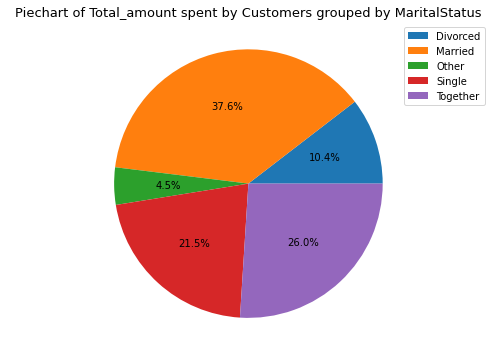

In [12]:
# 2b Enter your solution here
fig = plt.figure(figsize=[7, 5])
plt.axis("equal")

# Plotting pie chart
plt.pie(frequency["Total_amount"], autopct="%1.1f%%")
plt.title(
    "Piechart of Total_amount spent by Customers grouped by MaritalStatus", fontsize = 13
)
plt.legend(labels = frequency.index)
plt.tight_layout()
plt.show()


## Qs 3.  
* a) Create a new variable called `Recency(weights)` which is obtained by dividing the `Recency` variable into quintiles (0,1,2,3,4) such that customers lower Recency values have higher weights. i.e the smaller the recency value, the greater the `Recency(weights)`.

    * **COMPULSORY**: Validate your resulting by running:

```python
df[["Total_amount", "Avg_amount", "Avg_amount(weights)"]].sample(n=5, random_state=2)
```

* b) What is the percentage of customers that accepted at least an offer after the end of the promotion campaign?

In [62]:
# 3a Enter your solution here
# Create a new feature: 'Recency(weights)'

num_bins = 5  # No of bins division

df["Recency(weights)"] = pd.qcut(
    x=df["Recency"], q = num_bins, labels = ["4", "3", "2", "1", "0"] , duplicates="drop"
).astype(int)


df[["Total_amount", "Avg_amount", "Avg_amount(weights)","Recency", "Recency(weights)"]].sample(
    n=5, random_state=2)

,Total_amount,Avg_amount,Avg_amount(weights),Recency,Recency(weights)
2053,71,11.83,2,46,2
2019,22,3.67,0,75,1
1891,2069,344.83,9,87,0
335,946,157.67,7,38,3
1600,562,93.67,5,64,1


In [57]:
promotion = [
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Response",
]


In [59]:
# 3b Enter your solution here
# Determine the total number of offers accepted by customers after the campaign
customer_purchases = df["Total_accepted_cmp"] = df[promotion].sum(axis=1)

# Customers that made at least ONE purchase after running the ads
customer_purchases = df.loc[df["Total_accepted_cmp"] >= 1].shape[0]  # > 0

# total number of customers using count
Total_customers = df["Total_accepted_cmp"].count()

# percentage
percentage = (customer_purchases / Total_customers)*100
print(f"Percentage: {percentage}")

Percentage: 27.187499999999996


## Qs 4.  
* a) Calculate the frequency of the purchases. (Do this by finding the total number of purchases made by every customer)
* b) Create a new variable, `Frequency(weights)` by converting the result from the previous question to quartiles (0,1,2,3) such that the higher the `Frequency`, the higher the weight.

    * **COMPULSORY**: Validate your resulting by running:

```python
df[["Total_amount", "Avg_amount", "Avg_amount(weights)"]].sample(n=5, random_state=2)
```

In [25]:
# 4a Enter your solution here
purchases = [var for var in df if "Purch" in var]

df["total_purchases"] = np.sum(df[purchases], axis = 1)
df[["total_purchases"]]

,total_purchases
0,25
1,6
2,21
3,8
4,19
...,...
2235,18
2236,22
2237,19
2238,23


In [26]:
df["total_purchases"].unique()

array([25,  6, 21,  8, 19, 22, 10,  2,  4, 16, 15,  5, 26,  9, 13, 12, 43,
       17, 20, 14, 27, 11, 18, 28,  7, 24, 29, 23, 32, 30, 37, 31, 33, 35,
       39,  1, 34,  0, 44], dtype=int64)

In [27]:
# 4b Enter your solution here
# Create a new feature: 'frequency(weights)'
total_purchases = df["total_purchases"]
num_bins = 4  # No of bins division

df["frequency(weights)"] = pd.qcut(
    x=total_purchases, q=num_bins, labels=np.arange(num_bins), duplicates="drop"
).astype(str)

df[[
    "Total_amount", "Avg_amount", "Avg_amount(weights)","total_purchases", "frequency(weights)"
    ]
].sample(n=5, random_state=2)

,Total_amount,Avg_amount,Avg_amount(weights),total_purchases,frequency(weights)
2053,71,11.83,2,8,0
2019,22,3.67,0,4,0
1891,2069,344.83,9,20,2
335,946,157.67,7,22,3
1600,562,93.67,5,20,2


## Qs 5.  
* a) Calculate the `Customer Personality Analysis` using **RFM** (Recency Frequency Monetary) value using the formula:
`Recency(weights)` + `Frequency(weights)` + `Avg_amount(weights)`. 
* b) Create a new variable called `Customer_value` by segmenting the customers using the RFM value. The RFM value should be converted into tercile (3 groups). Customer_value should have the following labels: `high_value`, `medium_value` and `low_value` which represents the binned RFM values.

    * **COMPULSORY**: Validate your resulting by running:
```python
df[["Recency(weights)", "Frequency(weights)", "Avg_amount(weights)", "RFM", "Customer_value"]].sample(n=10, random_state=2)
```

In [28]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Total_amount', 'Avg_amount', 'Avg_amount(weights)', 'customer_income%',
       'MaritalStatus', 'Recency(weights)', 'total_purchases',
       'frequency(weights)'],
      dtype='object')

In [29]:
# 5a Enter your solution here
df["Customer Personality Analysis"] = (
    df["Recency(weights)"].astype(int) + df["frequency(weights)"].astype(int) + df["Avg_amount(weights)"].astype(int)
)

df["Customer Personality Analysis"].sample(n=10, random_state=2)

2053     4
2019     3
1891    15
335     11
1600    10
1459    10
2161     8
1026     5
68       8
2088     2
Name: Customer Personality Analysis, dtype: int32

In [30]:
# 5b Enter your solution here

In [36]:
num_bins = 3
#labels = ["low_value", "medium_value", "high_value"]

df["Customer_value"] = pd.qcut(
    x=df["Customer Personality Analysis"], q=num_bins, labels = ["low_value", "medium_value", "high_value"],
    duplicates="drop").astype(str)


df[
    ["Recency(weights)", "frequency(weights)", 
     "Avg_amount(weights)", 
     "Customer Personality Analysis", 
     "Customer_value"
    ]
].sample(n=10, random_state=2)

,Recency(weights),frequency(weights),Avg_amount(weights),Customer Personality Analysis,Customer_value
2053,2,0,2,4,low_value
2019,3,0,0,3,low_value
1891,4,2,9,15,high_value
335,1,3,7,11,high_value
1600,3,2,5,10,medium_value
1459,3,2,5,10,medium_value
2161,3,1,4,8,medium_value
1026,2,0,3,5,low_value
68,0,2,6,8,medium_value
2088,0,0,2,2,low_value
